# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'.

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I.
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II.
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'.

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




# Part I.

In [1]:
N = 19
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Gaming'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [3]:
df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")
df = df[cols]

In [4]:
df

,Daily_Usage_Hours,Sleep_Hours,Exercise_Hours,Screen_Time_Before_Bed,Time_on_Social_Media,Time_on_Gaming,Time_on_Education
0,4.0,6.1,0.1,1.4,3.6,1.7,1.2
1,5.5,6.5,0.0,0.9,1.1,4.0,1.8
2,5.8,5.5,0.8,0.5,0.3,1.5,0.4
3,3.1,3.9,1.6,1.4,3.1,1.6,0.8
4,2.5,6.7,1.1,1.0,2.6,0.9,1.1
...,...,...,...,...,...,...,...
2995,3.9,6.4,0.9,0.3,2.7,1.8,1.0
2996,3.6,7.3,0.0,0.9,3.1,0.0,0.3
2997,3.2,6.5,0.0,0.2,2.4,0.2,2.4
2998,6.7,7.5,0.2,1.6,1.7,2.6,1.5


In [5]:
data = df[cols[N%7]]

In [6]:
data

0       1.7
1       4.0
2       1.5
3       1.6
4       0.9
       ... 
2995    1.8
2996    0.0
2997    0.2
2998    2.6
2999    2.3
Name: Time_on_Gaming, Length: 3000, dtype: float64

In [7]:
data.describe()

count    3000.000000
mean        1.525267
std         0.932701
min         0.000000
25%         0.800000
50%         1.500000
75%         2.200000
max         4.000000
Name: Time_on_Gaming, dtype: float64

In [8]:
mean = data.mean()
var = data.var(ddof=1)
std = var ** 0.5
mode = data.mode().iat[0]
median = data.median()

print(mean, var, std, mode, median)

1.5252666666666663 0.869931572746471 0.9327012237294808 0.0 1.5


In [9]:
diffs = data - mean
kurtosis = (diffs ** 4).mean() / std ** 4 - 3
skewness = (diffs ** 3).mean() / std ** 3

print(kurtosis, skewness)

-0.501042538972909 0.25875186487551327


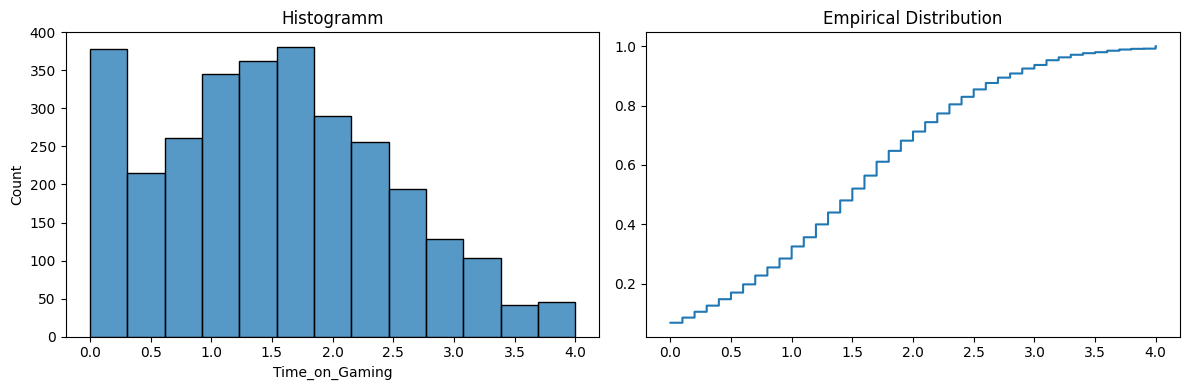

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data, bins = 1 + 12, kde = False)
plt.title("Histogramm")

plt.subplot(1,2,2)
ecdf = sm.distributions.ECDF(data)
x_ecdf = np.linspace(data.min(), data.max(), 3000)
y_ecdf = ecdf(x_ecdf)
plt.step(x_ecdf, y_ecdf)
plt.title("Empirical Distribution")

plt.tight_layout()
plt.show()

Среднее значение столбца около 1.53, дисперсия 0.87, стандартное отклонение 0.93. Мода данных равна 0, медиана 1.5. Квантили: 25-й процентиль примерно 0.8, 50-й процентиль 1.5, 75-й процентиль примерно 2.2. Интерквартильный размах 1.4. Коэффициенты формы распределения: эксцесс 0.50, асимметрия +0.26.

Гистограмма показывает двухмодальную структуру с пиками около 0 и 1.75, что говорит о наличии двух преобладающих групп значений. Эмпирическая функция распределения имеет участки перегиба, что указывает на неравномерную накопленность данных.

Судя по рассчитанным показателям и графикам, распределение данных явно отличается от нормального: асимметрия и эксцесс далеки от нуля, а форма хвостов визуально отличается от классической колоколообразной кривой.

# Part II.

In [12]:
from scipy.stats import chi2

bins = 1 + 12
counts, bin_edges = np.histogram(data, bins = bins)
mu, sigma = mean, std

expected = []
for i in range(len(bin_edges)-1):
  cdf_low = stats.norm.cdf(bin_edges[i], mu, sigma)
  cdf_high = stats.norm.cdf(bin_edges[i+1], mu, sigma)
  expected.append(3000 * (cdf_high - cdf_low))

chi2_stat = np.sum((counts - expected)**2 / expected)
df_chi2 = bins - 1 - 2
p_value = 1 - chi2.cdf(chi2_stat, df_chi2)

print(chi2_stat, df_chi2, p_value)

507.41140827758784 10 0.0


In [13]:
z_skewness = skewness / (6/3000) ** 0.5
z_kurtosis = kurtosis / (24/3000) ** 0.5
z_criterion = stats.norm.ppf(0.975)

print(z_skewness, z_kurtosis, z_criterion)

5.7858675916648785 -5.601825883812561 1.959963984540054


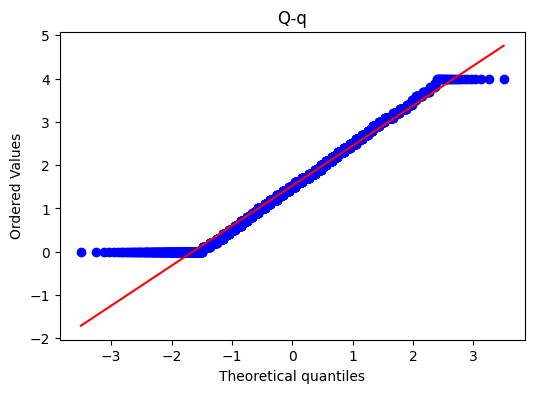

In [14]:
plt.figure(figsize=(6,4))
stats.probplot(data, dist = "norm", plot = plt)
plt.title('Q-q')
plt.show()

По результатам χ²-теста полученная статистика значительно превышает критическое значение, а p-значение близко к нулю, что свидетельствует об отклонении гипотезы о нормальном распределении. Z-критерии для асимметрии и эксцесса выходят за пределы интервала ±1.96, указывая на существенные отличия формы распределения от нормальной. Q-Q график также демонстрирует заметные отклонения точек от прямой, особенно в области хвостов.

В совокупности эти результаты показывают, что исходные данные не соответствуют нормальному распределению как по классическим тестам, так и по показателям, чувствительным к хвостам распределения.

# Part III.

0.018047619047619045 0.4438426391563627 0.6662151598067719 -1.0714285714285714 0.0
-0.501042538972909 0.25875186487551183


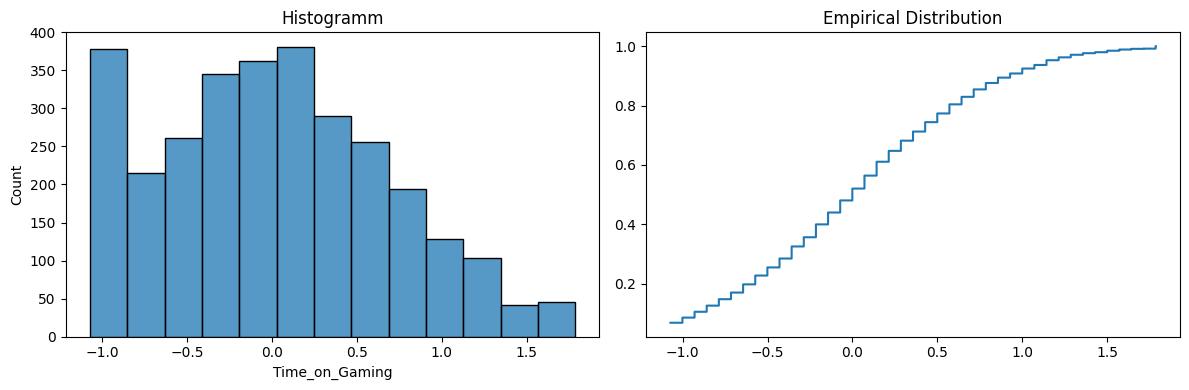

507.41140827758596 10 0.0
5.785867591664846 -5.601825883812561 1.959963984540054


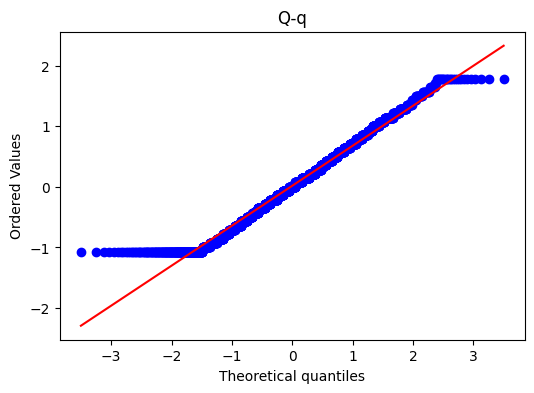

In [15]:
q25, q50, q75 = data.quantile([0.25, 0.5, 0.75])
iqr = q75 - q25
data_iqr = (data - q50) / iqr



mean = data_iqr.mean()
var = data_iqr.var(ddof=1)
std = var ** 0.5
mode = data_iqr.mode().iat[0]
median = data_iqr.median()

print(mean, var, std, mode, median)

diffs = data_iqr - mean
kurtosis = (diffs ** 4).mean() / std ** 4 - 3
skewness = (diffs ** 3).mean() / std ** 3

print(kurtosis, skewness)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data_iqr, bins = 1 + 12, kde = False)
plt.title("Histogramm")

plt.subplot(1,2,2)
ecdf = sm.distributions.ECDF(data_iqr)
x_ecdf = np.linspace(data_iqr.min(), data_iqr.max(), 3000)
y_ecdf = ecdf(x_ecdf)
plt.step(x_ecdf, y_ecdf)
plt.title("Empirical Distribution")

plt.tight_layout()
plt.show()




from scipy.stats import chi2

bins = 1 + 12
counts, bin_edges = np.histogram(data_iqr, bins = bins)
mu, sigma = mean, std

expected = []
for i in range(len(bin_edges)-1):
  cdf_low = stats.norm.cdf(bin_edges[i], mu, sigma)
  cdf_high = stats.norm.cdf(bin_edges[i+1], mu, sigma)
  expected.append(3000 * (cdf_high - cdf_low))

chi2_stat = np.sum((counts - expected)**2 / expected)
df_chi2 = bins - 1 - 2
p_value = 1 - chi2.cdf(chi2_stat, df_chi2)

print(chi2_stat, df_chi2, p_value)

z_skewness = skewness / (6/3000) ** 0.5
z_kurtosis = kurtosis / (24/3000) ** 0.5
z_criterion = stats.norm.ppf(0.975)

print(z_skewness, z_kurtosis, z_criterion)

plt.figure(figsize=(6,4))
stats.probplot(data_iqr, dist = "norm", plot = plt)
plt.title('Q-q')
plt.show()

-9.473903143468002e-18 1.0 1.0 -1.6353218242469603 -0.027089775400568113
-0.5010425389729094 0.25875186487551194


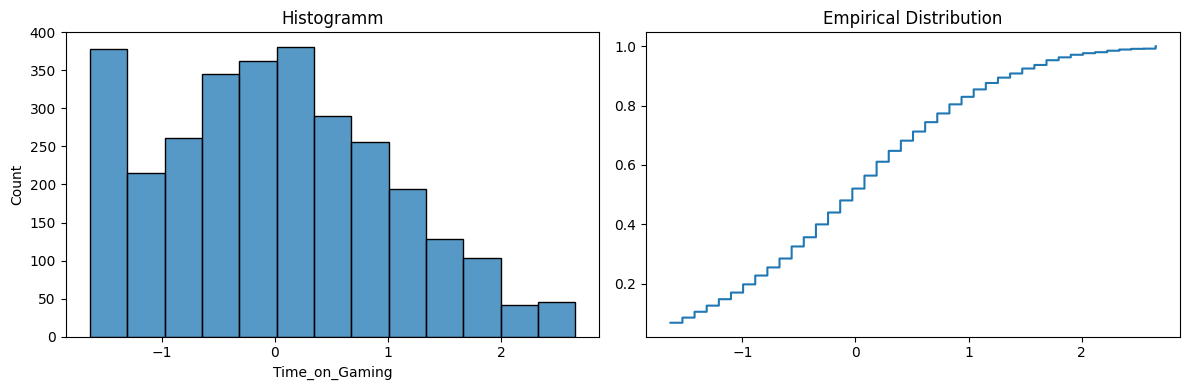

507.41140827758585 10 0.0
5.785867591664848 -5.601825883812565 1.959963984540054


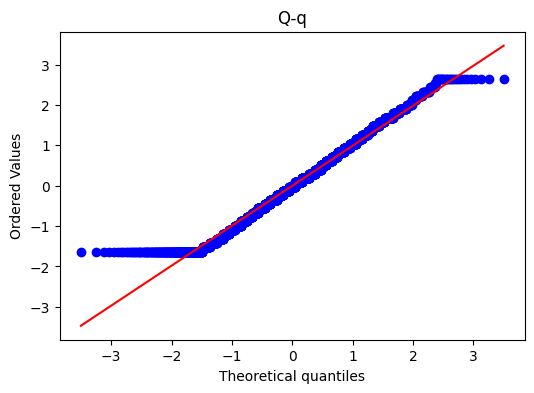

In [16]:
data_std = (data_iqr - data_iqr.mean()) / data_iqr.std(ddof = 1)



mean = data_std.mean()
var = data_std.var(ddof=1)
std = var ** 0.5
mode = data_std.mode().iat[0]
median = data_std.median()

print(mean, var, std, mode, median)

diffs = data_std - mean
kurtosis = (diffs ** 4).mean() / std ** 4 - 3
skewness = (diffs ** 3).mean() / std ** 3

print(kurtosis, skewness)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data_std, bins = 1 + 12, kde = False)
plt.title("Histogramm")

plt.subplot(1,2,2)
ecdf = sm.distributions.ECDF(data_std)
x_ecdf = np.linspace(data_std.min(), data_std.max(), 3000)
y_ecdf = ecdf(x_ecdf)
plt.step(x_ecdf, y_ecdf)
plt.title("Empirical Distribution")

plt.tight_layout()
plt.show()




from scipy.stats import chi2

bins = 1 + 12
counts, bin_edges = np.histogram(data_std, bins = bins)
mu, sigma = mean, std

expected = []
for i in range(len(bin_edges)-1):
  cdf_low = stats.norm.cdf(bin_edges[i], mu, sigma)
  cdf_high = stats.norm.cdf(bin_edges[i+1], mu, sigma)
  expected.append(3000 * (cdf_high - cdf_low))

chi2_stat = np.sum((counts - expected)**2 / expected)
df_chi2 = bins - 1 - 2
p_value = 1 - chi2.cdf(chi2_stat, df_chi2)

print(chi2_stat, df_chi2, p_value)

z_skewness = skewness / (6/3000) ** 0.5
z_kurtosis = kurtosis / (24/3000) ** 0.5
z_criterion = stats.norm.ppf(0.975)

print(z_skewness, z_kurtosis, z_criterion)

plt.figure(figsize=(6,4))
stats.probplot(data_std, dist = "norm", plot = plt)
plt.title('Q-q')
plt.show()


0.007222582624452927 0.3349492456973318 0.5787479984391581 0.13353139262452257 0.06899287148695142
0.02488032205546542 -0.6983110097149265


/Users/a.ramanavets/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


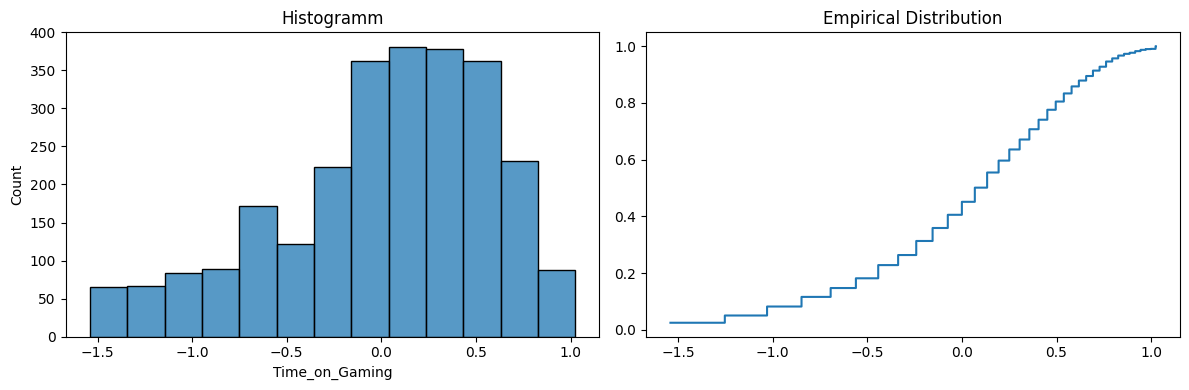

377.3157761209684 10 0.0
-15.614708871590917 0.27817045709053984 1.959963984540054


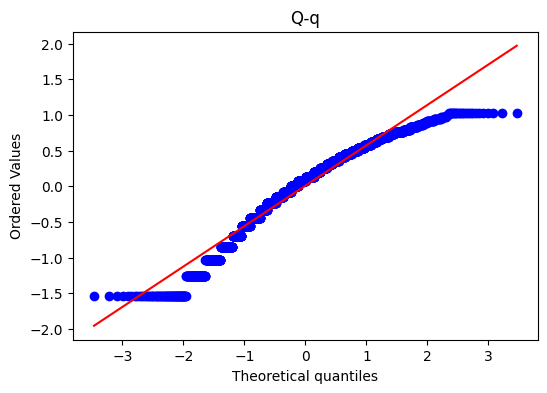

In [18]:
data_log = np.log(1+data_iqr)

q25, q50, q75 = data_log.quantile([0.25, 0.5, 0.75])
iqr = q75 - q25
lower = q25 - 1.5 * iqr
upper = q75 + 1.5 * iqr
data_somewhat_norm = data_log[(data_log > lower) & (data_log < upper)]





mean = data_somewhat_norm.mean()
var = data_somewhat_norm.var(ddof=1)
std = var ** 0.5
mode = data_somewhat_norm.mode().iat[0]
median = data_somewhat_norm.median()

print(mean, var, std, mode, median)

diffs = data_somewhat_norm - mean
kurtosis = (diffs ** 4).mean() / std ** 4 - 3
skewness = (diffs ** 3).mean() / std ** 3

print(kurtosis, skewness)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data_somewhat_norm, bins = 1 + 12, kde = False)
plt.title("Histogramm")

plt.subplot(1,2,2)
ecdf = sm.distributions.ECDF(data_somewhat_norm)
x_ecdf = np.linspace(data_somewhat_norm.min(), data_somewhat_norm.max(), 3000)
y_ecdf = ecdf(x_ecdf)
plt.step(x_ecdf, y_ecdf)
plt.title("Empirical Distribution")

plt.tight_layout()
plt.show()




from scipy.stats import chi2

bins = 1 + 12
counts, bin_edges = np.histogram(data_somewhat_norm, bins = bins)
mu, sigma = mean, std

expected = []
for i in range(len(bin_edges)-1):
  cdf_low = stats.norm.cdf(bin_edges[i], mu, sigma)
  cdf_high = stats.norm.cdf(bin_edges[i+1], mu, sigma)
  expected.append(3000 * (cdf_high - cdf_low))

chi2_stat = np.sum((counts - expected)**2 / expected)
df_chi2 = bins - 1 - 2
p_value = 1 - chi2.cdf(chi2_stat, df_chi2)

print(chi2_stat, df_chi2, p_value)

z_skewness = skewness / (6/3000) ** 0.5
z_kurtosis = kurtosis / (24/3000) ** 0.5
z_criterion = stats.norm.ppf(0.975)

print(z_skewness, z_kurtosis, z_criterion)

plt.figure(figsize=(6,4))
stats.probplot(data_somewhat_norm, dist = "norm", plot = plt)
plt.title('Q-q')
plt.show()


После удаления выбросов методом IQR размер выборки остался прежним, однако нормальное распределение данных не было достигнуто. Логарифмирование со сдвигом на единицу уменьшило значения асимметрии и эксцесса; на Q-Q графике точки приблизились к диагонали в центральной части, но в крайних квантилях по-прежнему наблюдаются отклонения. Стандартизация (z-преобразование) не изменяет форму распределения, а лишь приводит данные к нулевому среднему и единичному стандартному отклонению.

Среди применённых простых методов наибольший эффект дало логарифмирование: асимметрия стала ближе к нулю, эксцесс — менее отрицательным, однако достичь идеальной нормальности всё же не удалось.

# Part IV.

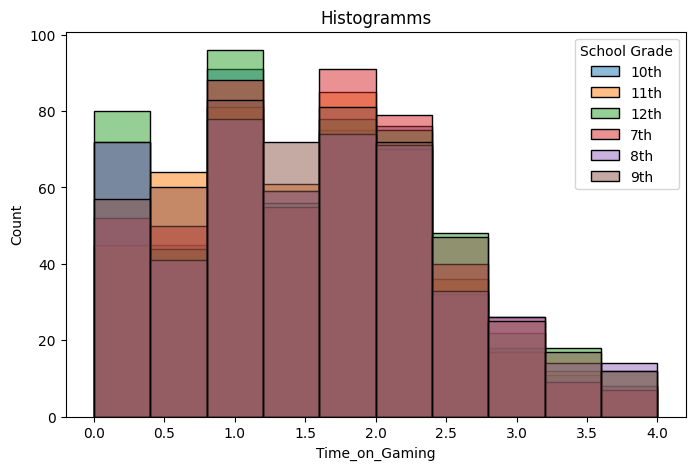

In [43]:
df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")
groups = df.groupby("School_Grade")[cols[N%7]]

plt.figure(figsize=(8,5))

for name, group in groups:

  sns.histplot(group, bins = 10, label = name, alpha = 0.5)

plt.legend(title = "School Grade")
plt.title("Histogramms")
plt.show()

In [44]:
stats_by_grade = groups.agg(['mean','var'])
stats_by_grade

,mean,var
School_Grade,,
10th,1.453183,0.861384
11th,1.512317,0.787609
12th,1.520227,0.943851
7th,1.554125,0.776682
8th,1.538589,0.964953
9th,1.569392,0.879880


Средние значения варьируются от 1.45 в 10-м классе до 1.57 в 9-м. Минимальное среднее наблюдается у десятиклассников, максимальное — у девятиклассников. Показатели 11-го и 12-го классов занимают промежуточное положение (около 1.51–1.52). При этом 7-й и 8-й классы выбиваются из общего тренда: у 7-го среднее значение (около 1.55) чуть выше, чем у 11-го и 12-го классов, а у 8-го (около 1.54) почти совпадает с показателем двенадцатого.

Дисперсия также различается между группами: наименьшие значения отмечены у 7-го (0.78) и 11-го (0.79) классов, что говорит о большей однородности данных. Наибольшая дисперсия характерна для 8-го (0.96) и 12-го (0.94) классов, где разброс значений максимален. Для 10-го и 9-го классов показатели дисперсии занимают среднее положение (0.86–0.88).